## Hypothesis tests

In this section, we'll be looking at different tests that can be used to carry out our hypothesis

## Typical Analysis Procedure

You should start your analysis by following these steps:
*  Visually inspect the data
*  Find extreme samples, and check them carefully.
*  Determine the data-type of the values.
*  If the data are continuous, check whether or not they are normally distributed.
*  Select and apply the appropriate test, or start with the model-based analysis of the data.

### Tests for Numerical data

#### T-test

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features. It is mostly used when the data setswould follow a normal distribution and may have unknown variances. Therefore it is called a parametric test. 

t-Test can be used in situations where need to compare the mean of one group with a known(fixed) value and when comparing the mean of two groups with respec to each other. We'll be looking a particular type of t-Test called independent t-Test.

The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.

* Population distributions are normal
* Samples have equal variances
* The two samples are independent

One rejects the the null hypothesis, if the computed t value is greater than or less than the critical t value. The critical t value is determined by the degrees of freedom and alpha. where alpha is always set to 0.05

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Independent t-Test with Python
# TASK: check if the difference in blood pressure between males and females after
# being treated is statistically significant

df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [3]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [79]:
# getting blood pressure after for male
male_bp = df['bp_after'][df['sex'] == 'Male']

# getting blood pressure after for female
female_bp = df['bp_after'][df['sex'] == 'Female']

stats.ttest_ind(male_bp, female_bp)

Ttest_indResult(statistic=3.3479506182111387, pvalue=0.0010930222986154283)

Here, we can see that pvalue (0.001) is less than 0.05, therefore the result is statistically significant and we reject the null hypothesis. In other words, There is a statistically significant difference in the average post blood pressure between males and females, t= 3.3480, p= 0.001

In [55]:
# TO DO: define a function that computes independent t test and use conditional statement 
# to decide whether we are rejecting or not rejecting the null hypothesis (based on the P value)

we can have a cleaner ouput using a library called researchpy

In [56]:
#!pip install researchpy

In [80]:
import researchpy as rp
summary, results = rp.ttest(male_bp, female_bp, group1_name= "Male", group2_name= "Female")
print(summary)

   Variable      N        Mean         SD        SE   95% Conf.    Interval
0      Male   60.0  155.516667  15.243217  1.967891  151.578926  159.454407
1    Female   60.0  147.200000  11.742722  1.515979  144.166533  150.233467
2  combined  120.0  151.358333  14.177622  1.294234  148.795621  153.921046


In [81]:
print(results)

              Independent t-test   results
0  Difference (Male - Female) =     8.3167
1          Degrees of freedom =   118.0000
2                           t =     3.3480
3       Two side test p value =     0.0011
4      Difference < 0 p value =     0.9995
5      Difference > 0 p value =     0.0005
6                   Cohen's d =     0.6112
7                   Hedge's g =     0.6074
8               Glass's delta =     0.5456
9                 Pearson's r =     0.2945


#### Comparison between multiple groups (ANOVA)

ANOVA stands for "Analysis of Variance" and is an omnibus test, meaning it tests for a difference overall between all groups. The one-way ANOVA, also referred to as one factor ANOVA, is a parametric test used to test for a statistically significant difference of an outcome between 3 or more groups.

The assumptions
* Population distributions are normal
* Samples have equal variances
* Independence

In [5]:
# getting the dataset
libido_df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
libido_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   person  15 non-null     int64
 1   dose    15 non-null     int64
 2   libido  15 non-null     int64
dtypes: int64(3)
memory usage: 488.0 bytes


In [6]:
libido_df.head()

,person,dose,libido
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4


In [7]:
# A bit of data clean up here
# we are dropping the person column because we dont need the info for this analysis
# we'll also recode the dose category into string

#libido_df.drop('person', axis= 1, inplace= True)

dose_dict = {1: 'placebo', 2: 'low', 3: 'high'}
libido_df['dose'].replace(dose_dict, inplace= True)

libido_df.head()

,person,dose,libido
0,1,placebo,3
1,2,placebo,2
2,3,placebo,1
3,4,placebo,1
4,5,placebo,4


In [8]:
# slice the data frame to get the libido for each dose
high_dose = libido_df['libido'][libido_df['dose'] == 'high']
low_dose = libido_df['libido'][libido_df['dose'] == 'low']
placebo = libido_df['libido'][libido_df['dose'] == 'placebo']

# perform the test
stats.f_oneway(high_dose, low_dose, placebo)

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

Interpretaion
* A new medication was developed to increase the libido of those who take the medication. The purpose of this study was to test for a difference between the dosage levels. There is a statistically significant difference between the groups and their effects the libido, F= 5.12, p-value= 0.0247.

### Tests for Categorical data (Chi-sqaure test of Independence)

The  test of independence tests for dependence between categorical variables and is an omnibus test. Meaning, that if a significant relationship is found and one wants to test for differences between groups then post-hoc testing will need to be conducted. Typically, a proportions test is used as a follow-up post-hoc test.

In [9]:
# To load a sample dataset for this demonstration
import statsmodels.api as sm

citytemp_df = sm.datasets.webuse("citytemp2")
citytemp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   division  956 non-null    category
 1   region    956 non-null    category
 2   heatdd    953 non-null    float64 
 3   cooldd    953 non-null    float64 
 4   tempjan   954 non-null    float32 
 5   tempjuly  954 non-null    float32 
 6   agecat    956 non-null    category
dtypes: category(3), float32(2), float64(2)
memory usage: 33.4 KB


In [87]:
citytemp_df.head()

,division,region,heatdd,cooldd,tempjan,tempjuly,agecat
0,N. Eng.,NE,NaN,NaN,16.600000,69.599998,19-29
1,N. Eng.,NE,7947.0,250.0,18.200001,68.000000,19-29
2,Mid Atl,NE,7480.0,424.0,18.400000,70.199997,19-29
3,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29
4,N. Eng.,NE,7482.0,353.0,19.900000,69.500000,19-29


In [88]:
# Let's see if the relationship between region and age category is statistically significant
# This is a two-step analysis using the scipy library
# step 1: construct a crosstab using pandas
# step 2: pass the table to scipy.stats.chi2_contingency

crosstab = pd.crosstab(citytemp_df["region"],citytemp_df["agecat"])

crosstab

agecat,19-29,30-34,35+
region,,,
NE,46,83,37
N Cntrl,162,92,30
South,139,68,43
West,160,73,23


In [89]:
stats.chi2_contingency(crosstab)

(61.28767688406036,
 2.463382670201326e-11,
 6,
 array([[ 88.03556485,  54.87029289,  23.09414226],
        [150.61506276,  93.87447699,  39.51046025],
        [132.58368201,  82.63598326,  34.78033473],
        [135.76569038,  84.61924686,  35.61506276]]))

The information is returned within a tuple where the first value is the  test static, the second value is the p-value, and the third number is the degrees of freedom. An array is also returned which contains the expected cell counts.

From this test, we can conclude that: There is a relationship between region and the age distribution with p< 0.0001.

### Statistical Modelling (Correlation and Regression)

#### Correlation

A correlation is a statistical measure of the relationship between two variables. The measure is best used in variables that demonstrate a linear relationship between each other. we can visually inspect relationships using scatter plot and formally establish the relationps using correlation coefficient.

The correlation coefficient is a value that indicates the strength of the relationship between variables. The coefficient can take any values from -1 to 1. The interpretations of the values are:

* -1: Perfect negative correlation. The variables tend to move in opposite directions (i.e., when one variable increases, the other variable decreases).
* 0: No correlation. The variables do not have a relationship with each other.
* 1: Perfect positive correlation. The variables tend to move in the same direction (i.e., when one variable increases, the other variable also increases).
 

In [67]:
# We can use either numpy, scipy, or pandas for finding correlation
citytemp_df.corr()

,heatdd,cooldd,tempjan,tempjuly
heatdd,1.000000,-0.707417,-0.978090,-0.481379
cooldd,-0.707417,1.000000,0.638644,0.861101
tempjan,-0.978090,0.638644,1.000000,0.349403
tempjuly,-0.481379,0.861101,0.349403,1.000000


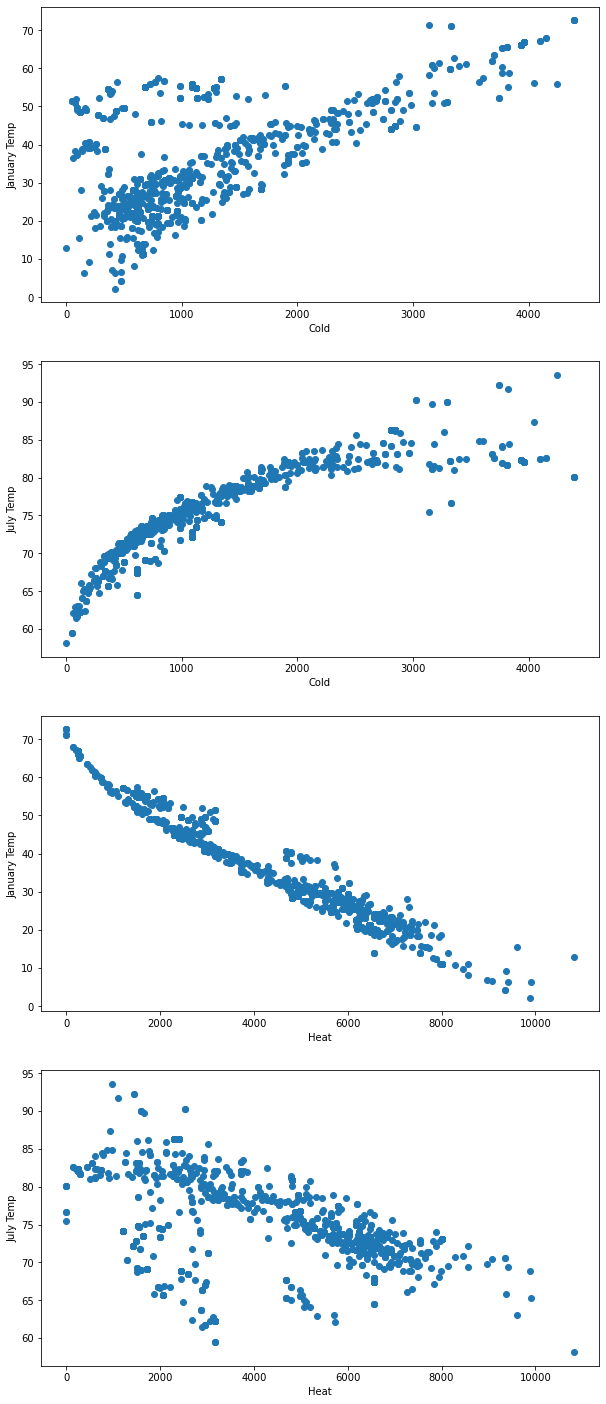

In [90]:
# Visualizing the relationships with scatterplot
fig, ax = plt.subplots(4, figsize=(10, 25))
ax[0].scatter(x = citytemp_df["cooldd"], y = (citytemp_df["tempjan"]))
ax[0].set_xlabel("Cold")
ax[0].set_ylabel("January Temp")

ax[1].scatter(x = citytemp_df["cooldd"], y = (citytemp_df["tempjuly"]))
ax[1].set_xlabel("Cold")
ax[1].set_ylabel("July Temp")

ax[2].scatter(x = citytemp_df["heatdd"], y = (citytemp_df["tempjan"]))
ax[2].set_xlabel("Heat")
ax[2].set_ylabel("January Temp")

ax[3].scatter(x = citytemp_df["heatdd"], y = (citytemp_df["tempjuly"]))
ax[3].set_xlabel("Heat")
ax[3].set_ylabel("July Temp")

plt.show()

In [91]:
# correlation between two variables
#x.corr(y)
citytemp_df["cooldd"].corr(citytemp_df["tempjan"])

0.638643544944592

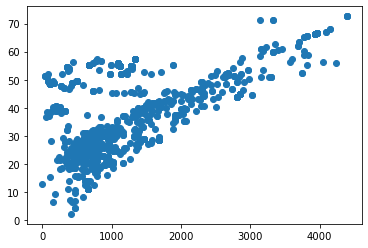

In [92]:
# visualizing with scatter plot
plt.scatter(x=citytemp_df["cooldd"],
                        y = citytemp_df["tempjan"])

#### Correlation and causation

Correlation must not be confused with causality. The famous expression “correlation does not mean causation” is crucial to the understanding of the two statistical concepts.

If two variables are correlated, it does not imply that one variable causes the changes in another variable. Correlation only assesses relationships between variables, and there may be different factors that lead to the relationships. Causation may be a reason for the correlation, but it is not the only possible explanation

#### Regression

Regression is a method to determine the statistical relationship between a dependent variable and one or more independent variables. Linear regression is used to test the relationship between independent variable(s) and a continous dependent variable. For example, you can observe several __employees__ of some company and try to understand how their salaries depend on the __features__, such as experience, level of education, role, city they work in, and so on. This can be broadly classified into linear regression and logistic regression.

The __coefficient of determination, denoted as 𝑅²__, tells you which amount of variation in 𝑦 can be explained by the dependence on 𝐱 using the particular regression model. Larger 𝑅² indicates a better fit and means that the model can better explain the variation of the output with different inputs.

In [10]:
# Research question: does weight and brand nationality (domestic or foreign) significantly effect mile per galloon?
# let's fetch the data
auto_df = sm.datasets.webuse('auto')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.5+ KB


In [11]:
auto_df.head()

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [12]:
auto_df["foreign"].unique()

['Domestic', 'Foreign']
Categories (2, object): ['Domestic' < 'Foreign']

statsmodel uses patsy for parsing formula and the syntax looks like this:

`smf.ols("dependent_variable ~ independent_variable1 + independent_variable2 + independent_variablen",data = df).fit()`

Read more about patsy here https://medium.com/@mummertm/using-patsy-for-statistical-modeling-189a9d9f5d27

In [95]:
import statsmodels.formula.api as smf
# modelling
model = smf.ols("mpg ~ weight + C(foreign)", data=auto_df).fit()  # C is used to indicate that the variable is categorical
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     69.75
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.76e-17
Time:                        12:38:59   Log-Likelihood:                -194.18
No. Observations:                  74   AIC:                             394.4
Df Residuals:                      71   BIC:                             401.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                41.67